<a href="https://colab.research.google.com/github/gonulsinem/Deep-Learning---Derin-Ogrenme/blob/main/2_CIFAR_10_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch Dokumanlarindan - Training a Classifier 

In [ ]:
# kutuphaneler import edildi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch 
import torchvision
import torchvision.transforms as transforms

#CNN layer
import torch.nn as nn
import torch.nn.functional as F

#optimizer and loss func
import torch.optim as optim

In [ ]:
# [0,1] ciktilari [-1,1] araligina normalize edilir

transform = transforms.Compose(
    [trasnforms.ToTensor(), trasnforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
train_set = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform=transform)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download = True, transform= transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified


In [ ]:
# siniflar belirlendi
class_names=["airplane","automobile","bird","cat",
"deer","dog","frog","horse","ship","truck"]

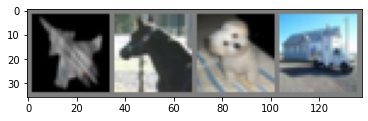

In [ ]:
# goruntuyu gostermek icin


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# egitim kumesinden goruntuler
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images

  
imshow(torchvision.utils.make_grid(images))





In [ ]:
# CNN Layer
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # relu aktivasyon fonk ile
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten katmani, duzlestirme katmani
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [ ]:
## optimizer ve loss function tanimlama

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
for epoch in range(2): #epoch sayisi

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #inputs, girdiler [inputs, labels]
        inputs, labels = data

        
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #girdiler
        loss = criterion(outputs, labels) #kayip, loss
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2000 mini-batch'de bir yazdir
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training - Egitim Bitti')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.198
[1,  4000] loss: 1.873
[1,  6000] loss: 1.660
[1,  8000] loss: 1.561
[1, 10000] loss: 1.497
[1, 12000] loss: 1.471
[2,  2000] loss: 1.401
[2,  4000] loss: 1.379
[2,  6000] loss: 1.340
[2,  8000] loss: 1.338
[2, 10000] loss: 1.304
[2, 12000] loss: 1.299
Finished Training - Egitim Bitti


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
#modeli kaydetti

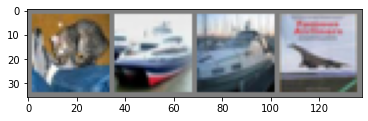

GroundTruth:    cat  ship  ship airplane


In [ ]:
# test asamasi
# test setinden goruntuler
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))
#modeli tekrar yukledik

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship automobile  ship


In [ ]:
correct = 0
total = 0
# gradyan hesabi yok
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # ciktilari hesaplama
        outputs = net(images)
        # en yuksek enerjili sinif tahmin sinifidir
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images---Agin dogrulugu: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images---Agin dogrulugu: 55 %


In [ ]:
#her sinif icin tahmin
correct_pred = {classname: 0 for classname in class_names}
total_pred = {classname: 0 for classname in class_names}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # her sinif icin dogru tahminleri topla
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[class_names[label]] += 1
            total_pred[class_names[label]] += 1


# siniflar icin tahminler
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class airplane is: 56.5 %
Accuracy for class automobile is: 61.3 %
Accuracy for class bird  is: 29.7 %
Accuracy for class cat   is: 20.0 %
Accuracy for class deer  is: 50.6 %
Accuracy for class dog   is: 61.1 %
Accuracy for class frog  is: 68.3 %
Accuracy for class horse is: 63.2 %
Accuracy for class ship  is: 74.4 %
Accuracy for class truck is: 69.2 %
